# Correlación cruzada

La correlación cruzada es una operación muy similar a la convolución que nos permite medir el grado de similitud de 2 señales en el instante $t_0$ pero también con diferentes desplazamientos entre las señales analizadas (retardos y adelantos).

La <b>correlación cruzada</b> se define como:

$r_{xy}[l]=\sum\limits_{n=-\infty}^{\infty}x[n]y[n-l], ~~~~~~l=0, \pm1, \pm2, ...$

* $l$ es el parámetro de desplazamiento (retardo o adelanto de la señal).
* El subíndice $xy$ indica las secuencias que se van a correlar y su orden indica la dirección en que se desplaza una respecto a la otra.


Analizando la forma de calcular la correlación cruzada podemos ver que es muy similar a la convolución. Si vemos las operaciones en detalle nos daremos cuenta que la correlación cruzada prescinde de la operación de reflejar la secuencia pero el resto de las operaciones coinciden. 

Convolución vs Correlación
* ~~Una secuencia se refleja~~
* La secuencia se desplaza
* Se multiplican las secuencias y se obtiene la secuencia producto
* Se suman los valores de la secuencia producto 


Esta similitud nos puede facilitar la implementación de la correlación cruzada, ya que podemos emplear el algoritmo de convolución reflejando la señal antes de pasarla como argumento a la función

* resultado de la convolucion= <code>convolve(x[n],h[n])</code>
* resultado de la correlación cruzada= <code>convolve(x[n],h[-n])</code>




In [1]:
#librerias necesarias para la práctica
%matplotlib inline 

import matplotlib.pyplot as plt
import numpy as np
import IPython
from scipy import signal
from scipy.io import wavfile
import seaborn as sns
plt.rcParams["figure.figsize"] = (14,4) #dimensiones por defecto al plotear (width, height)

## Visualización 

Un gráfico típico que nos encontraremos en la teoría y en los libros es el de "piruleta" o stem (barras con un círculo encima). Este tipo de gráficos se pueden realizar facilmente con matplotlib.  Voy a dejar una función ya configurada que podeis modificar a vuestro gusto.

In [2]:
#Este es un método de visualización muy básico para hacer pruebas
def plot_stem( t , y, y_lim=None, view_baseline=False, title=None):
    """Función que configura y visualiza un gráfico stem 

       Parámetros:
       t -- muestras de tiempo
       y -- secuencia para visualizar
       y_lim -- tupla de la forma (min, max) que establece los límites en el eje de ordenadas. Por defecto None
       view_baseline -- Establece una línea horizontal en el eje de las x a la altura de  y=0 . Por defecto False

    """
    markerline, stemlines, baseline = plt.stem(t, y,use_line_collection=True)
    plt.setp(baseline, visible=view_baseline)
    plt.setp(markerline, color="crimson",markersize = 10)
    plt.setp(stemlines, color="crimson", linewidth = 4)
    if 0 in t:
        plt.axvline(x=0, linewidth=1,color="black")
    
    plt.ylim(y_lim)
    if title is not None:
        plt.title(title)
    plt.show()
    
    


### correlation_lags

scipy tiene un método para gestionar los índices de la correlación PERO aparece a partir de  la versión 1.6. 
En caso de que no tengáis esa versión y no podáis actualizar, podéis usar este método

In [3]:
def own_correlation_lags(in1_len, in2_len):
    '''
    Calcula el array de índices que representan los lags o desplazamientos para la correlación 1-D
    
    Parámetros
    in1_len: longitud de la primera señal en la operación de correlación
    in2_len: longitud de la segunda señal en la operación de correlación
    Return
    array de índices que representan los lags
    '''
    return np.arange(-in2_len + 1, in1_len)

## Ejemplo de correlación cruzada
La función de correlación cruzada la podeis obtener de la implementación de la convolución que hicisteis en la práctica anterior,  reflejando la señal, tal y como se explicó anteriormente pero, además, la podeis encontrar en diferentes paquetes como, por ejemplo, *numpy.correlate* o  *scipy.signal.correlate* (aunque la función de scipy realmente emplea numpy por debajo).



<b>Ejemplo</b>: Correlación cruzada entre una señal con ruido y la señal original

Vamos a ver un ejemplo muy sencillo en el que "enviamos" una señal a través de un canal y la recibimos con ruido (vamos, por ahora,  a obviar el retardo y la atenuación que tendría dicha señal)

C:\Users\MARCOS.BOULLON\AppData\Local\Temp\ipykernel_2116\678735572.py:12: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerline, stemlines, baseline = plt.stem(t, y,use_line_collection=True)


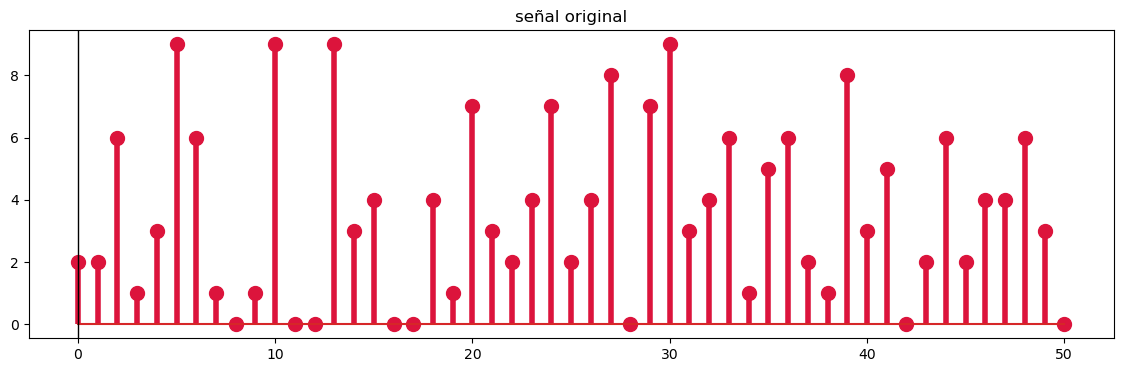

In [4]:
##Creamos la señal
np.random.seed(123)#semilla para repetir los números aleatorios
signal_size=50
x=np.arange(signal_size+1)
sig=np.random.randint(10, size=len(x))
plot_stem(x,sig, title="señal original", view_baseline=True)



C:\Users\MARCOS.BOULLON\AppData\Local\Temp\ipykernel_2116\678735572.py:12: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerline, stemlines, baseline = plt.stem(t, y,use_line_collection=True)


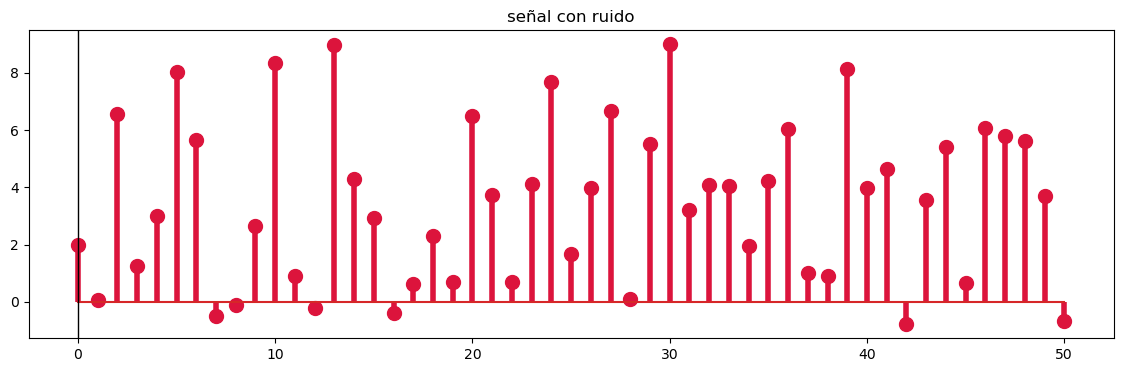

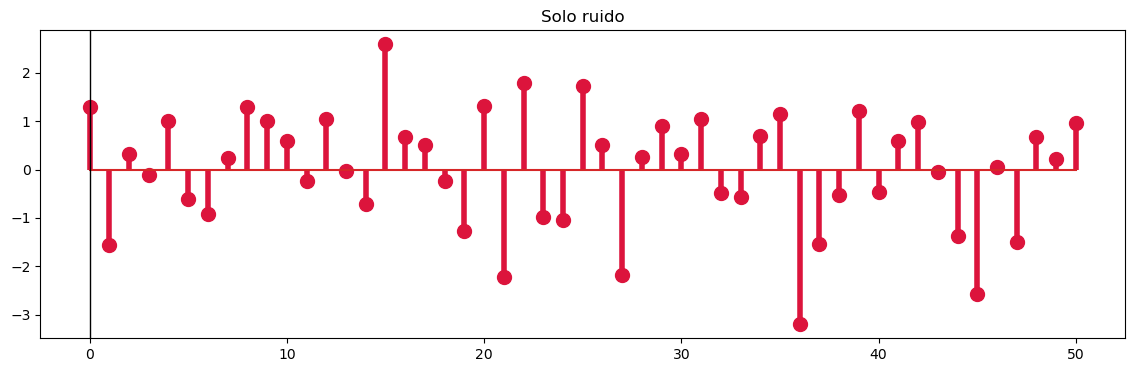

In [5]:
## Simulamos que mandamos la señal y la recibimos con ruido (sin retardo)
sig_noise = sig + np.random.randn(len(sig))
##creamos una señal solo con ruido para ver las diferencias
only_noise=np.random.randn(len(sig))#ruido uniformemente distribuido  media 0 sigma 1
plot_stem(x,sig_noise, title="señal con ruido", view_baseline=True)
plot_stem(x,only_noise, title="Solo ruido", view_baseline=True)


Se puede observar que la señal con ruido y el ruido solo no tienen porque ser tan fáciles de distinguir a simple vista. El uso de la correlación cruzada nos puede ayudar a encontrar la señal

C:\Users\MARCOS.BOULLON\AppData\Local\Temp\ipykernel_2116\678735572.py:12: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerline, stemlines, baseline = plt.stem(t, y,use_line_collection=True)


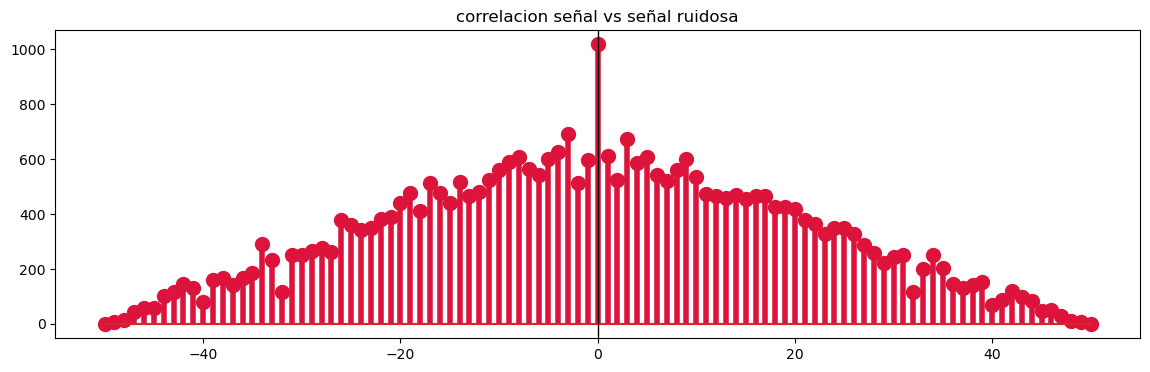

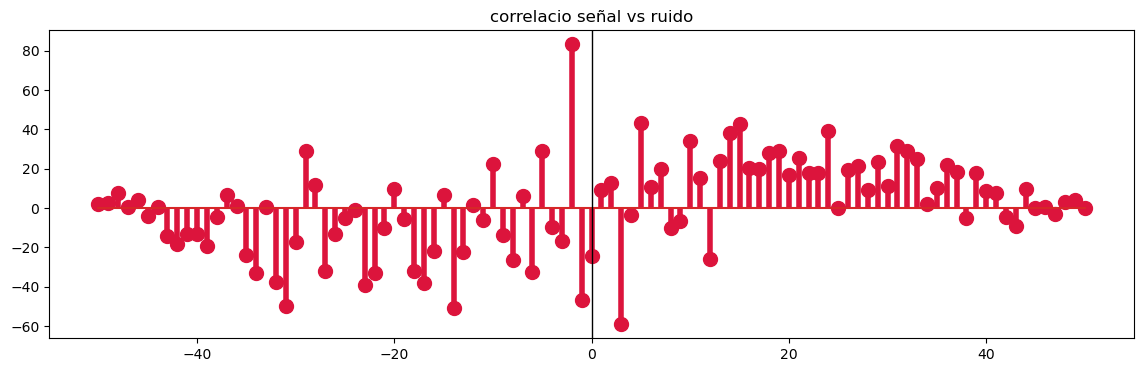

In [6]:
##Obtenemos la correlación
corr = signal.correlate(sig, sig_noise)#obtenemos la correlación
#corr /= np.max(corr) #normalizamos los valores
lags = signal.correlation_lags(len(sig), len(sig_noise))#calcula los índices de la correlación cruzada 1-D entre dos señales
#lags = own_correlation_lags(len(sig), len(sig_noise))#calcula los índices de la correlación cruzada 1-D entre dos señales

##Repetimos lo mismo con la señal que es solo ruido
corr2 = signal.correlate(sig, only_noise)#obtenemos la correlación
#corr2 /= np.max(corr2) #normalizamos los valores
lags2 = signal.correlation_lags(len(sig), len(only_noise))#calcula los índices de la correlación cruzada 1-D entre dos señales
#lags2 = own_correlation_lags(len(sig), len(only_noise))#calcula los índices de la correlación cruzada 1-D entre dos señales



plot_stem(lags,corr, title="correlacion señal vs señal ruidosa", view_baseline=True)
plot_stem(lags2,corr2, title="correlacio señal vs ruido", view_baseline=True)


## Autocorrelación 

* La <b>autocorrelación</b> es la correlación cruzada de una señal consigo misma (desplazada)

* Es útil, por ejemplo para encontrar patrones repetitivos de una señal enmascarada bajo el ruido

* La autocorrelación se define como:
    
    $r_{xx}[l]=\sum\limits_{n=-\infty}^{\infty}x[n]y[n-l], ~~~~~~l=0, \pm1, \pm2, ...$
    
    
Fijándonos en la fórmula podemos ver que la autocorrelación en $n=0$ toma el valor máximo y representa la energía de la señal 
    
   
### Ejemplo de autocorrelación
   
Creamos una señal aleatorio y la repetimos para generar una señal periódica. Al resultado le añadimos ruido para representar una señal real

In [7]:
##autocorrelación

periodo=np.random.randint(15,20)#el tamaño del período es aleatorio
sig_auto=[ np.random.randint(10) for i in range(periodo)]*10 #
sig_auto_noise=sig_auto+ np.random.randn(len(sig_auto))

Es importante destacar que no siempre es fácil ver la periocidad de la señal gráficamente. Vamos a dibujar la señal crear para ejemplificar esto último. <b>¿Puedes ver a simple vista el periodo?</b>

C:\Users\MARCOS.BOULLON\AppData\Local\Temp\ipykernel_2116\678735572.py:12: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerline, stemlines, baseline = plt.stem(t, y,use_line_collection=True)


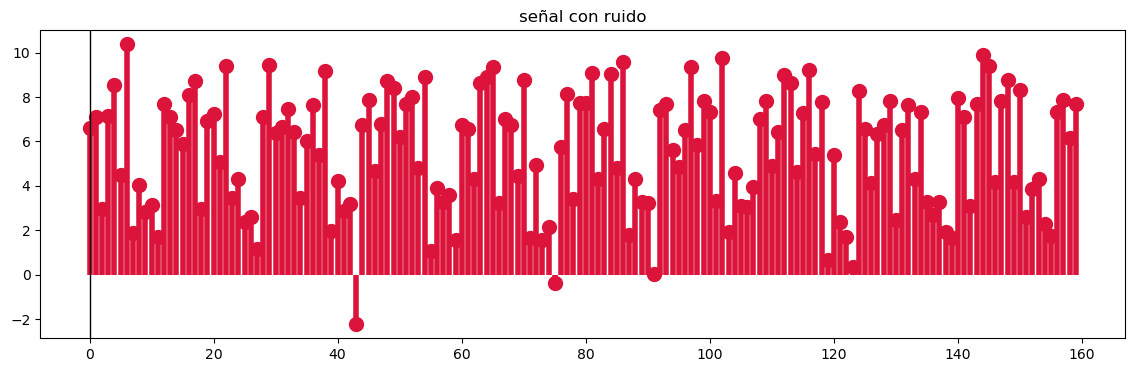

In [8]:
plot_stem(range(len(sig_auto_noise)),sig_auto_noise, title="señal con ruido")

Vamos a calcular la correlación y comprobar si los resultados coinciden con el valor de la variable *periodo*

C:\Users\MARCOS.BOULLON\AppData\Local\Temp\ipykernel_2116\678735572.py:12: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerline, stemlines, baseline = plt.stem(t, y,use_line_collection=True)


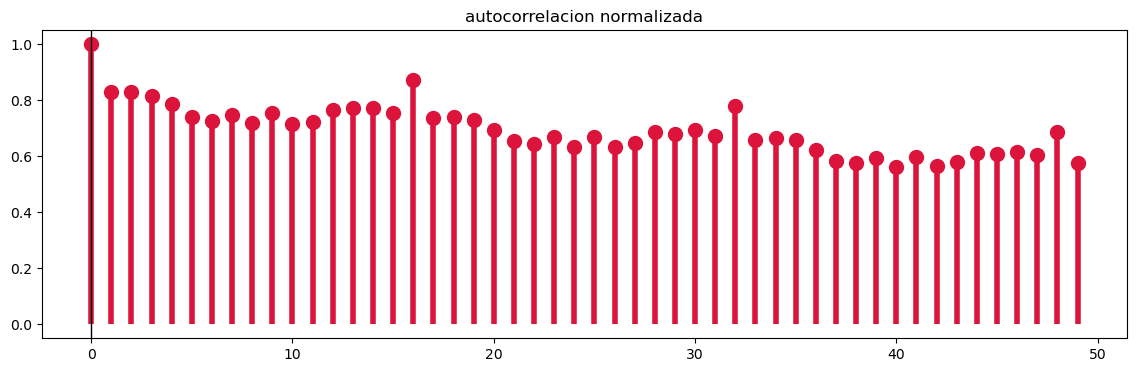

El período empleada es 16. ¿Puedes ver ese período en la gráfica?


In [9]:
corr = signal.correlate(sig_auto_noise, sig_auto_noise)#obtenemos la autocorrelación
corr /= np.max(corr) #normalizamos los valores
lags = signal.correlation_lags(len(sig_auto_noise), len(sig_auto_noise))#calcula los índices de la correlación cruzada 1-D entre dos señales

#voy a mostrar solo los 50 índices positivos primeros para que la gráfica sea más clara
plot_stem(lags[list(lags).index(0):list(lags).index(0)+50],corr[list(lags).index(0):list(lags).index(0)+50], title="autocorrelacion normalizada")
print("El período empleada es {0}. ¿Puedes ver ese período en la gráfica?".format(periodo))


    


## Ejercicios

<span style='background:yellow' ><b>Ejercicio</b></span>

Tal y como se comentaba anteriormente, el algoritmo de la correlación cruzada es muy parecido al de la convolución. Para comprobarlo teneis que  emplear el algoritmo que implementamos en la práctica anterior para la convolución y adaptarlo levemente para que pueda ser empleado en la correlación cruzada


In [10]:
##Os dejo mi implementación de la convolución pero aquí iría la vuestra
def op_convolucion(x,h):
     
     elementos_x=len(x)
     elementos_h=len(h)   
     elementos_conv=elementos_x+elementos_h-1#el número de valores de la convolución
             
     #creo la matriz x con tantas filas como elementos de la convolución y tantas columnas como elementos de h   
     mat_x=np.mat(np.array([np.concatenate(([0]*i, x,[0]*(elementos_conv-(elementos_x+i)) ))for i in range(elementos_h)])).transpose()
    
     #creo la matriz h
     mat_h=np.mat(np.array(h)).transpose()
     #multiplico las matrices y lo convierto en lista para devolverlo
     return (mat_x*mat_h).transpose().tolist()[0]


def mi_convolucion(x,ind_x, h, ind_h):
    muestras=np.arange(ind_x[0]+ind_h[0], ind_x[1]+ind_h[1]+1)#Gestiono los índices reales de la convolución
    sum_conv= op_convolucion(x,h)#Llamo a la operación de convolución
    return muestras, sum_conv
    
    

C:\Users\MARCOS.BOULLON\AppData\Local\Temp\ipykernel_2116\678735572.py:12: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerline, stemlines, baseline = plt.stem(t, y,use_line_collection=True)


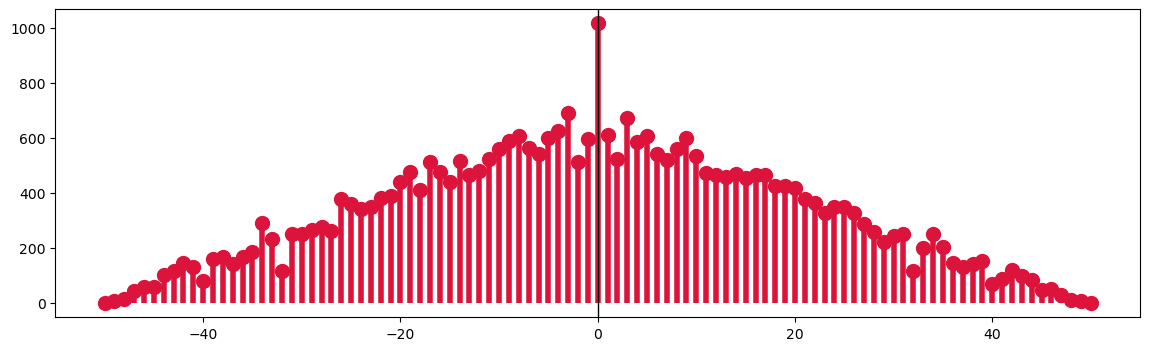

In [11]:
#Ajusto los índices para que se visualice como en la operación de correlación
#y demostrar que obtenemos lo mismo
muestras, corr = mi_convolucion(sig,(-signal_size//2,signal_size//2),sig_noise[::-1],(-signal_size//2,signal_size//2) )#obtenemos la correlación
plot_stem(muestras,corr)  
   


<span style='background:yellow' ><b>Ejercicio</b></span>

<b>Estimación del tiempo de retardo en las señales de radar</b>

Vamos a simular que mandamos una señal de radar y que recibimos una respuesta. Recordamos que, si existe un blanco, la señal recibida estará formada por una versión retrasada de la señal transmitida, reflejada desde el blanco, y distorsionada por efecto del ruido aditivo.

$y[n]=ax[n-D] + v[n]$

Si no existe blanco la señal será solo ruido.

Teniendo 2 señales,  el problema de la detección del radar consiste en comparar $x[n]$ e $y[n]$ para saber si existe blanco y en caso afirmativo determinar el tiempo de retardo para saber la distancia al blanco

En este ejercicio vamos a emitir una <b>secuencia de Barker</b> de 13-puntos

$x[n]=\{+1,+1,+1,+1,+1,-1,-1,+1,+1,-1,+1,-1,+1\}$


Las secuencias o códigos Barker del tipo binario están compuestas por una sucesión de –1’s y +1’s de una longitud finita, tal que <b>su función de autocorrelación cumple que $r_{xx}[l] =< 1 $ para todo $l\ne 0$ </b>


El ruido ($v[n]$) estará formado por una secuencia aleatoria gaussiana con media igual a cero y $\sigma^2=0.01$

 
<code>sigma * np.random.randn(...) + mu</code>

o

<code>np.random.normal(mu,sigma, size)</code>


La atenuación será de 0.9 y el retardo de 20

1. Crea una secuencia Barker de 13 puntos. Calcula y visualiza  su autocorrelación para comprobar sus propiedades
2. Crea el código necesario para simular la emisión/recepción de una secuencia arbitraria en un radar. Necesitareis una función *transmision* que convierta la señal emitida en $y[n]$
    * <code>def transmision(signal, mu_ruido=0, varianza=0.01, atenuacion=0.9, retardo=20, target=True):</code>
    * Si *target*=True, entonces la señal original viene de vuelta tras encontrar un blanco (con ruido, atenuada y retrasada), en caso contrario recibiremos solo ruido.
    * *retardo*: identifica el desplazamiento entre la señal enviada y la recuperada. Ej. si definimos un retardo de 20 muestras, la señal emitida tardará 20 muestras en recuperarse po lo que  las primeras 20 muestras de $y$ serán ruido y a continuación vendrá la señal reflejada
    * La función devolverá tantas muestras como se han enviado. Ej. con retardo 3 y SIN ruido NI atenuación
        * x[n]=\{+1,+1,+1,+1,+1,-1,-1,+1,+1,-1,+1,-1,+1\,0,0,0,0,0}
        * y[n]=\{0,0,0,+1,+1,+1,+1,+1,-1,-1,+1,+1,-1,+1,-1,+1\,0,0}
    
3. Crea una secuencia $x$ para enviar basada en la secuencia de Barker en el rango $0<=n<=100$
    * Cubrireis con ceros la parte de $x[n]$ no incluida en la secuencia de barker
4. *Emite* la secuencia creada a través de la función desarrollada en el apartado anterior y recupera una señal $y$ en el rango $0<=n<=100$
5. Dibuja en un mismo gráfico la señal enviada y la reflejada cuando se encuentra un blanco
    * Para visualizar podéis emplear *seaborn* que es una librería más sencilla de utilizar que matplotlib y con muchas opciones gráficas (consultar api en seaborn.pydata.org/). Para mostrar 2 señales en la misma gráfica podeis usar este código
     ```python 
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax=sns.lineplot(x=range(len(x)), y=x, ax=ax)
sns.lineplot(x=range(len(x)), y=rdo, ax=ax)
plt.show()
    ```
    
4. Calcula y dibuja la correlación cruzada $r_{xy}[l]$
    * ¿Puedes encontrar facilmente el retardo en la gráfica?
    * Compara con el caso de que el radar no encuentre blanco y obtenga solo ruido

 
5. Repite los ejercicios para $\sigma^2=0.1$ y  $\sigma^2=1$
    * ¿Qué ocurre?
    

    

C:\Users\MARCOS.BOULLON\AppData\Local\Temp\ipykernel_2116\678735572.py:12: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerline, stemlines, baseline = plt.stem(t, y,use_line_collection=True)


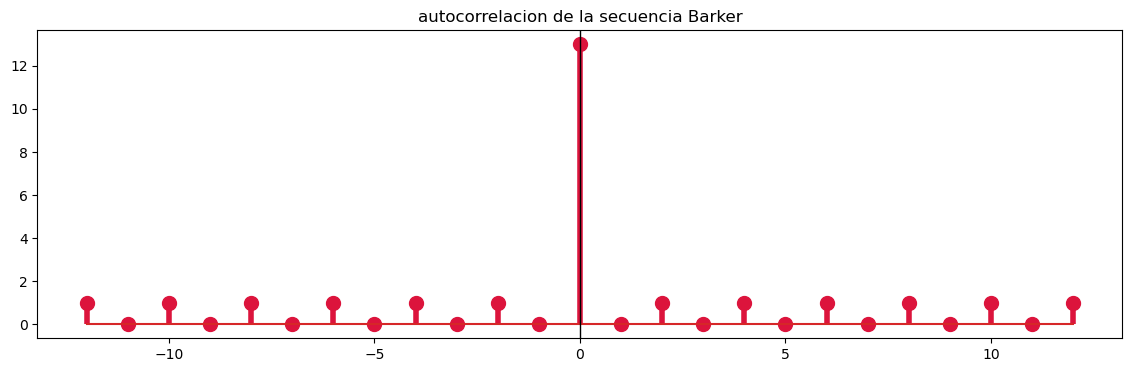

In [12]:
 #ej1
    
#Creo la secuencia de barker
x=[1,1,1,1,1,-1,-1,1,1,-1,1,-1,1]

#calculo la autocorrelacion para la secuencia barker
autolags= signal.correlation_lags(len(x), len(x))#calcula los índices de la correlación cruzada 1-D entre dos señales
autocorr = signal.correlate(x, x)#Obtenemos la autocorrelación
plot_stem(autolags, autocorr, view_baseline=True, title="autocorrelacion de la secuencia Barker")

In [13]:
#ej2
#Codigo para transmitir y una función para extender con ceros cualquier señal arbitraria
def transmision(signal, mu_ruido=0, varianza=0.01, atenuacion=0.9, retardo=20,target=True):
    #parámetros ruido 
    sigma=np.sqrt(varianza)
    #parametros radar
    noise=np.random.normal(mu_ruido,sigma,len(signal))
    noise_signal=signal+noise
    return  np.concatenate( (np.random.normal(mu_ruido,sigma,retardo),noise_signal[:-retardo])) if target else noise
  
def extend_signal_zeros(signal, n):
   ## Tened en cuenta que [0]*-x =[], por lo que no necesito comprobar si n>len(signal)
   return np.concatenate((signal, [0]*(n+1-len(signal))))

In [14]:
##Ej3. Emision de la señal
#extiendo una secuencia Barker
size_signal=100
emit_signal=extend_signal_zeros(x,size_signal)

#Emito la señal y encuentro un target
rdo_target=transmision(emit_signal)
#rdo_target=transmision(emit_signal, varianza=0.1)
#rdo_target=transmision(emit_signal, varianza=1)

#Emito la señal y NO encuentro un target
rdo_noise=transmision(emit_signal, target=False)
#rdo_noise=transmision(emit_signal, varianza=0.1,target=False)
#rdo_noise=transmision(emit_signal, varianza=1,target=False)


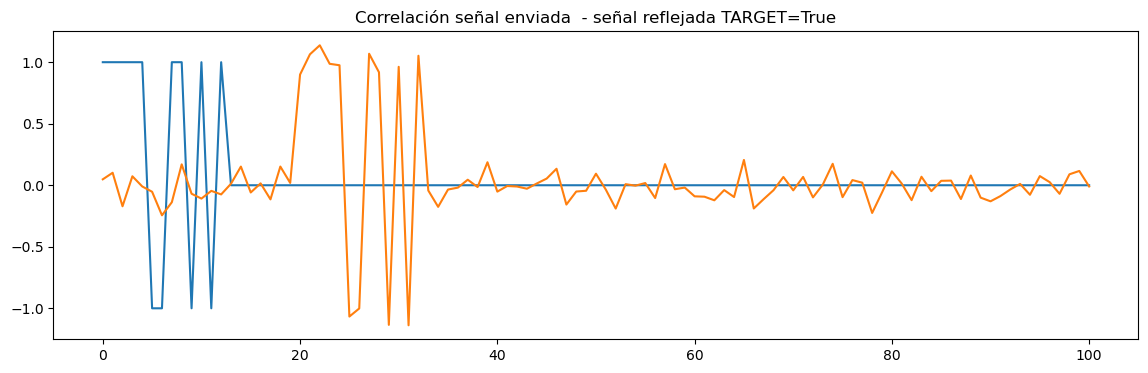

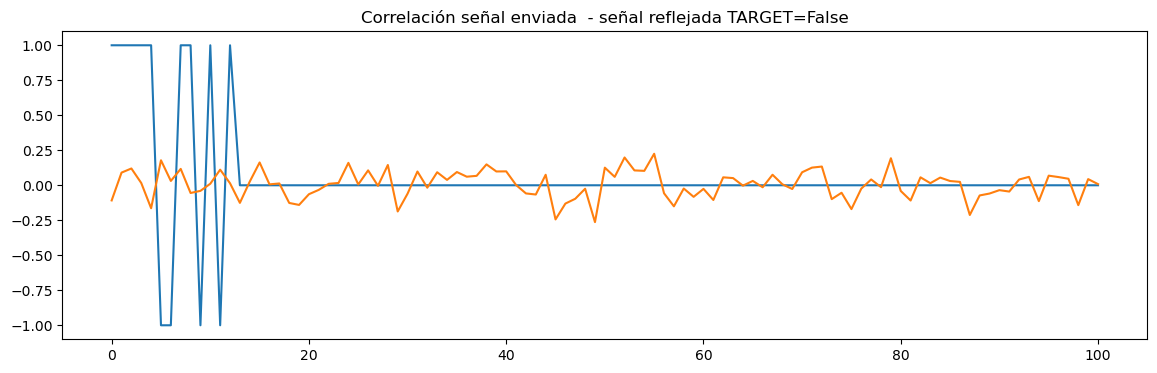

In [15]:
#Ej4. Dibujo en un gráfico la secuencia enviada y la reflejada
f, ax = plt.subplots()
ax=sns.lineplot(x=range(len(emit_signal)), y=emit_signal, ax=ax)
sns.lineplot(x=range(len(emit_signal)), y=rdo_target, ax=ax)
plt.title("Correlación señal enviada  - señal reflejada TARGET=True")
plt.show()

f, ax = plt.subplots()
ax=sns.lineplot(x=range(len(emit_signal)), y=emit_signal, ax=ax)
sns.lineplot(x=range(len(emit_signal)), y=rdo_noise, ax=ax)
plt.title("Correlación señal enviada  - señal reflejada TARGET=False")
plt.show()

C:\Users\MARCOS.BOULLON\AppData\Local\Temp\ipykernel_2116\678735572.py:12: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerline, stemlines, baseline = plt.stem(t, y,use_line_collection=True)


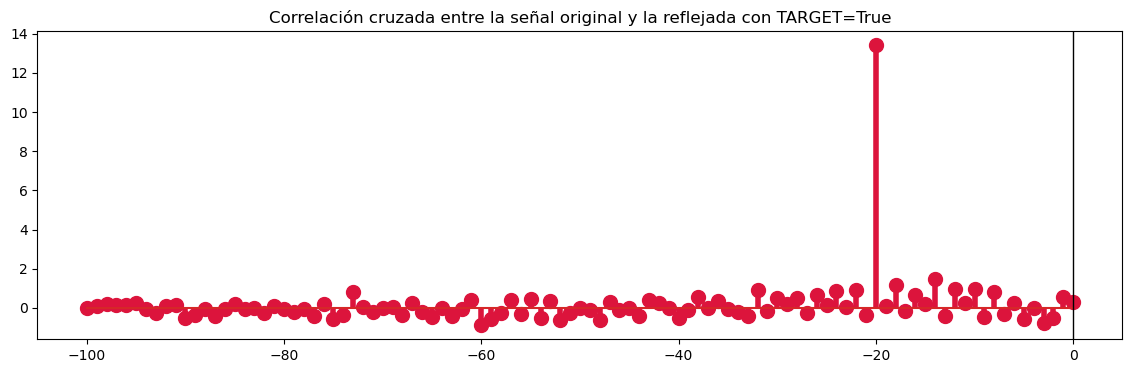

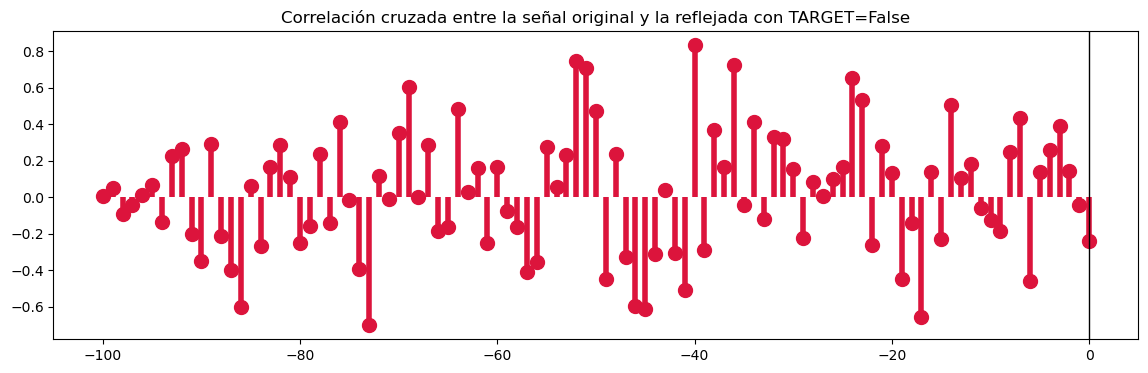

In [16]:
corrlags= signal.correlation_lags(len(emit_signal), len(rdo_target))#calcula los índices de la correlación cruzada 1-D entre dos señales
corr = signal.correlate(emit_signal, rdo_target)
#corr/=max(corr)#normalizamos, no es necesario
#El juego de índices que realizo no es necesario pero es para visualizar solo la sección que me interesa
plot_stem(corrlags[0:size_signal+1],corr[0:size_signal+1],view_baseline=True, title="Correlación cruzada entre la señal original y la reflejada con TARGET=True")


corrlags= signal.correlation_lags(len(emit_signal), len(rdo_noise))#calcula los índices de la correlación cruzada 1-D entre dos señales
corr = signal.correlate(emit_signal, rdo_noise)
#corr/=max(corr)#normalizamos, no es necesario
#El juego de índices que realizo no es necesario pero es para visualizar solo la sección que me interesa
plot_stem(corrlags[0:size_signal+1],corr[0:size_signal+1], title="Correlación cruzada entre la señal original y la reflejada con TARGET=False")












<span style='background:yellow' ><b>Ejercicio</b></span>

Desarrolla las siguientes secuencias y calcula y visualiza las siguientes correlaciones: $r_{xx}[l]$ y $r_{xy}[l]$ 


 $x[n] = \left \{ \begin{matrix} 1, & n_0-N<=n<=n_0+N
\\ 0 & en~otro~caso\end{matrix}\right.$ 



 $y[n] = \left \{ \begin{matrix} 1, & -N<=n<=N
\\ 0 & en~otro~caso\end{matrix}\right.$ 




<b>Nota</b> En este tipo de ejercicios **la idea es crear las funciones parametrizadas** que permitan hacer estos cálculos variando los argumentos. Para comparar podeis tomar $N=10$ y representar una señal entre $-30<=n<=30$. 

<b>Nota 2</b>: Para hacerlo más general podemos poner $n_0$ como un parámetro de la función. Para comparar tomaremos  $n_0$ como la primera muestra temporal de la secuencia de x[n] (ej. -30)


C:\Users\MARCOS.BOULLON\AppData\Local\Temp\ipykernel_2116\678735572.py:12: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerline, stemlines, baseline = plt.stem(t, y,use_line_collection=True)


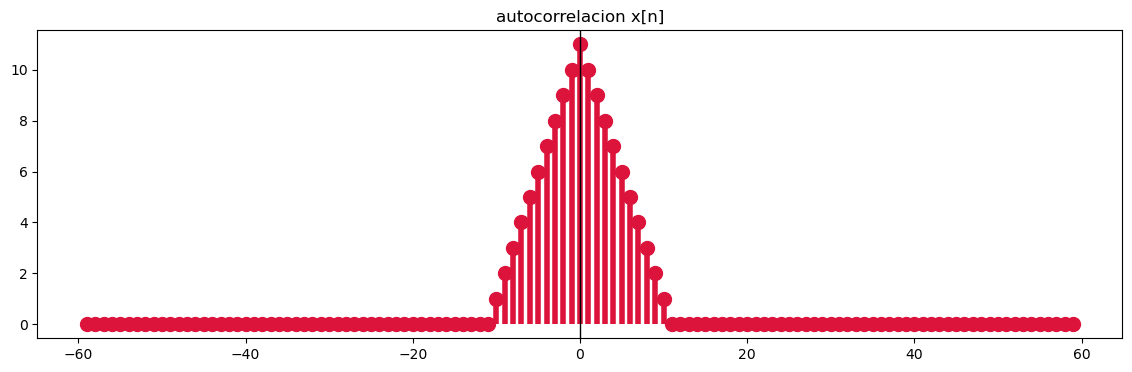

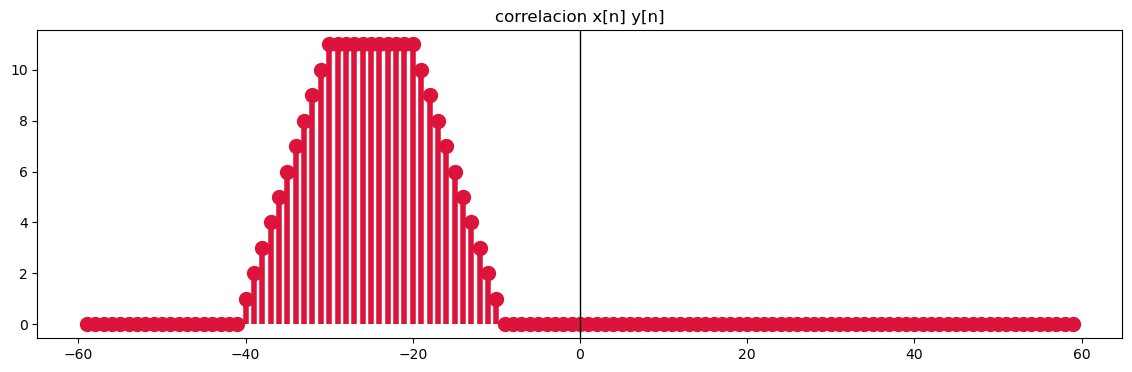

In [17]:
def createx(muestras, N=10,n0=0):
    return [1 if (n0-N)<=n<=(n0+N) else 0 for n in muestras ]


def createy(muestras, N=10):       
    return [1 if -N<=n<=N else 0 for n in muestras]



muestras=np.arange(-30,30)
x=createx(muestras,n0=-30)

y=createy(muestras)


autolags= signal.correlation_lags(len(x), len(x))#calcula los índices de la correlación cruzada 1-D entre dos señales
autocorr = signal.correlate(x, x)#btenemos la autocorrelación

#plot_stem(muestras, x, title="x[n]")
plot_stem(autolags,autocorr, title="autocorrelacion x[n]")



lags= signal.correlation_lags(len(x), len(x))#calcula los índices de la correlación cruzada 1-D entre dos señales
corr = signal.correlate(x, y)#btenemos la correlación


#plot_stem(muestras, y, title="y[n]")
plot_stem(lags,corr, title="correlacion x[n] y[n]")






<span style='background:yellow' ><b>Ejercicio</b></span>
Calcula la autocorrelación para las siguientes señales 

* $x[n]=\{\underrightarrow{1},2,1,1\}$
* $x1[n]=\{\underrightarrow{1},1,2,1\}$


* ¿Qué puedes concluir?



C:\Users\MARCOS.BOULLON\AppData\Local\Temp\ipykernel_2116\678735572.py:12: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerline, stemlines, baseline = plt.stem(t, y,use_line_collection=True)


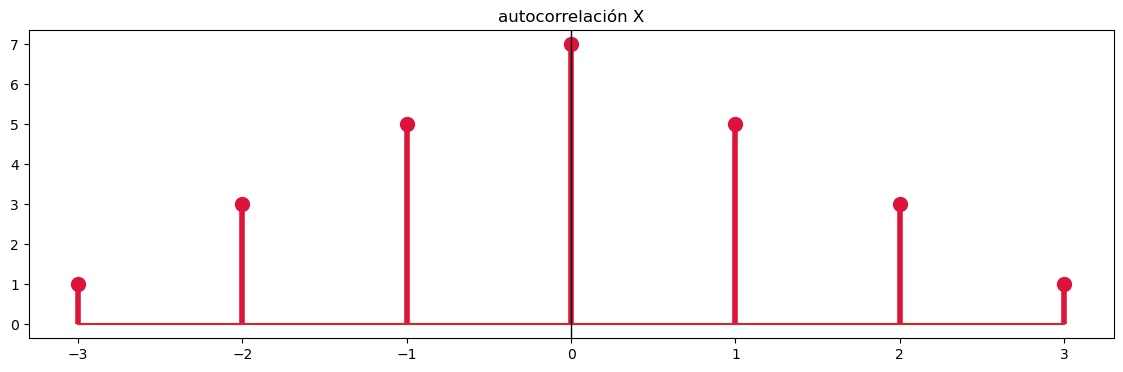

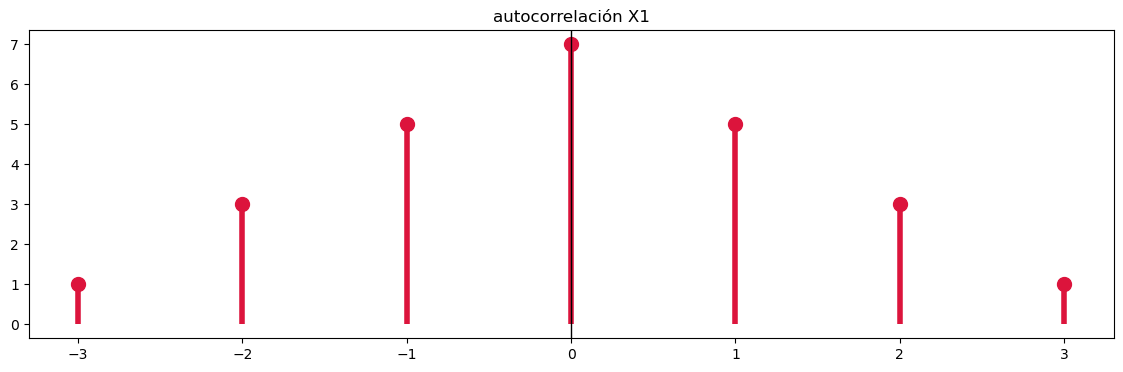

La señal x1 es un reflejo de x y su autocorrelación no varía


In [18]:
x=[1,2,1,1]
x1=x[::-1]

autolags= signal.correlation_lags(len(x), len(x))#calcula los índices de la correlación cruzada 1-D entre dos señales
autocorr1 = signal.correlate(x, x)#obtenemos la autocorrelación

plot_stem(autolags,autocorr1, title="autocorrelación X", view_baseline=True)


autolags= signal.correlation_lags(len(x1), len(x1))#calcula los índices de la correlación cruzada 1-D entre dos señales
autocorr = signal.correlate(x1, x1)#obtenemos la autocorrelación


plot_stem(autolags,autocorr, title="autocorrelación X1")



print("La señal x1 es un reflejo de x y su autocorrelación no varía")

<span style='background:yellow' ><b>Ejercicio</b></span>

Una señal de audio $s(t)$ generada por un altavoz se refleja en dos paredes diferentes con coeficientes de reflexión $r_1$ y $r_2$. La señal registrada por un micrófono próximo al altavoz, después del muestreo, es: 

$y[n]= s[n]+r_1s[n−k_1]+r_2s[n−k_2]$ .

donde $s[n]$ es la señal original muestreada,  k1 y k2 son los retardos de los dos ecos y $r_1$ y $r_2$ los coeficientes de reflexión

* Implementar las funciones necesarias para crear el escenario descrito
    * Podeis usar el *mensaje.wav* de la primera práctica
    * Se necesitará una función para crear ecos
    <code>
        def eco(signal, r, k):
    </code>
    * Se necesitará una función que simule el resultado de transmitir el audio, Esta función recibirá como argumento la señal original y con ella creará los 2 ecos y devolverá la suma las tres señales

* Determinar la correlación $r_{sy}$
    * Aplicad un resample de la señal para poder "ver" algo en la gráfica
    <code>
    muestreado=signal[0:len(signal):500]
    </code>
  
    * Analizar la correlación ¿Se puede sacar información sobre $r_1$, $r_2$, $k_1$ y $k_2$ observando la gráfica?
   

In [19]:


def eco(signal, r, k):
     return [0 if muestra<k else r*signal[muestra-k] for muestra in range(len(signal))]

def transmision(signal, r1,r2, k1,k2):
    #utilizo porcentajes para luego poder hacer resamples y no estar atado a un índice concreto
    eco1=eco(signal,r1, k1 )
    eco2=eco(signal,r2, k2 )
    return signal+ eco1+eco2




#Cargamos un mensaje de voz
rate, s = wavfile.read('mensaje.wav') #Return the sample rate (in samples/sec) and data from an LPCM WAV file
# Rescalado simple de la señal,
norm = 1.0 / max(np.absolute([min(s), max(s)]))
analogica = 100.0 * s * norm
#discretización de los valores para la señal digital
digital = np.round(analogica)

#argumentos
r1=0.6
r2=0.5
k1=int(len(digital)*0.1) #defino el retardo a través de un porcentaje
k2=int(len(digital)*0.2) #defino el retardo a través de un porcentaje

plt.plot(digital);
plt.title("Señal de voz")
plt.show()
rdo_eco=transmision(digital, r1=r1,r2=r2, k1=k1,k2=k2)


plt.plot(rdo_eco);
plt.title("Señal de voz con eco")
plt.show()
IPython.display.Audio(rdo_eco, rate=rate)








FileNotFoundError: [Errno 2] No such file or directory: 'mensaje.wav'

In [ ]:
#argumentos
muestreado_digital=digital[0:len(digital):500]#hago un resample para poder visualizar mejor los datos
k1=50
k2=100
r1=0.6
rdo_eco=transmision(muestreado_digital,r1=r1,r2=r2, k1=k1,k2=k2)



autolags= signal.correlation_lags(len(rdo_eco), len(rdo_eco))#calcula los índices de la correlación cruzada 1-D entre dos señales
autocorr = signal.correlate(rdo_eco, rdo_eco)#btenemos la autocorrelación

autocorr/=max(autocorr)
plot_stem(autolags,autocorr, title="correlacion s vs y")

## Sistemas descritos mediante ecuaciones en diferencias con coeficientes constantes

El comportamiento de muchos sistemas físicos puede describirse de acuerdo a una ecuación diferencial. Esto nos permite expresar la salida de un sistema en función de valores pasados de la propia salida.

La relación que existe entre la entrada y la salida de un sistema descrito por una ecuación en diferencias lineal y con coeficientes constantes se expresa, en su forma general de la siguiente manera

$y[n]=-\sum\limits_{n=1}^{N}a_k y[n-k] +\sum\limits_{n=0}^{M} b_kx[n-k]$


La función [signal.lfilter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html) de scipy permite implementar dichas ecuaciones. La cabecera de la función es: *signal.lfilter(b, a, x, axis=- 1, zi=None)*
* *a* es el vector con los valores correspondientes a las constantes $a_k, k=0..N$
* *b* es el vector con los valores correspondientes a las constantes $b_k, k=0..M$
* *x* es el vector de entrada
* *zi* un vector opcional con las condiciones iniciales del sistema


Para establecer las condiciones iniciales del sistema tenemos que crear el vector $zi$. Se puede realizar "a mano", si es sencillo, o se puede emplear la función   [signal.lfiltic](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfiltic.html#scipy.signal.lfiltic) que permite establecer condiciones iniciales más complejas, incluyendo N y M entradas y salidas pasadas.

<b>Nota</b>: Si se emplea el vector *zi* La función *lfilter* devuelve 2 resultados (2 arrays). El segundo contendrá información sobre los *delays* finales del sistema. 




<span style='background:yellow' ><b>Ejercicio</b></span>

Sea un sistema descrito por la ecuación:

$y[n]=\alpha y[n-1]+x[n]$

* Sabiendo que este sistema es LIT, calcula (**empleando ecuaciones en diferencias con coeficientes constantes**)  40 muestras de la respuesta al impulso ($x[n=\delta[n]$) para los siguientes casos:
    * $\alpha=1$ (para generar $h_1$)
    * $\alpha=0.5$ (para generar $h_2$)
    * $\alpha=1.1$ (para generar $h_2$) 
    * **Tened cuidado con los signos en los vectores** *a* y *b* de la función 
    * Visualiza los resultados
    
    
* Supongamos ahora que la entrada es: $x[n]=e^{-0.5n}u[n]$ . 
    * Calcula las salidas para cada uno de los sistemas del apartado anterior
    * Emplead *np.exp()*


* Evalua y representa la salida del sistema para la entrada $x[n]$ imponiendo la condición inicial $y[-1]=0.5$ y asignando el valor  $\alpha=0.5$
    * Usad signal.lfiltic para crearlo




In [ ]:
def create_impulso(muestras):
    return 1*(muestras==0)

def create_x(muestras):
    return [np.exp(-0.5*i) if i>=0 else 0  for i in muestras]


muestras=np.arange(40)
x=create_x(muestras)
impulso=create_impulso(muestras)

#respuestas impulsionales
h1=signal.lfilter([1],[1,-1.],impulso)
plot_stem(muestras, h1, title="H1")


h2=signal.lfilter([1],[1,-.5],impulso)
plot_stem(muestras,h2, title="H2")

h3=signal.lfilter([1],[1,-1.1],impulso)
plot_stem(muestras, h3, title="H3")









In [ ]:

##Para x[n]

y1=signal.lfilter([1],[1,-1.],x)
plot_stem(muestras, y1)
y2=signal.lfilter([1],[1,-.5],x)
plot_stem(muestras, y2)
y3=signal.lfilter([1],[1,-1.1],x)
plot_stem(muestras, y3)




In [ ]:


##Con condiciones iniciales

zi = signal.lfiltic([1], [1, -0.5], y=[0.5])

respuesta_x=signal.lfilter([1],[1,-0.5],x, zi=zi)[0]
plot_stem(np.arange(len(respuesta_x)), respuesta_x)
